# Data exploration and loading 💫

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hanaibrahim124","key":"1f8889576cb336216c9a0b607bf3b64a"}'}

In [3]:
import os
if os.path.exists("kaggle (1).json"):
    os.rename("kaggle (1).json", "kaggle.json")


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile("asl-alphabet.zip", "r") as zip_ref:
    zip_ref.extractall("asl_alphabet")

In [7]:
data_path = "asl_alphabet/asl_alphabet_train"
print("Classes:", os.listdir(data_path)[:10])

Classes: ['asl_alphabet_train']


In [8]:
nested_path = os.path.join(data_path, "asl_alphabet_train")
print("Inside nested folder:", os.listdir(nested_path)[:10])

Inside nested folder: ['J', 'I', 'Z', 'P', 'W', 'M', 'R', 'A', 'X', 'C']


In [9]:
dataset_dir = "asl_alphabet/asl_alphabet_train/asl_alphabet_train"

In [10]:
# printing first 10 classes
classes = os.listdir(dataset_dir)
print(classes, classes[:10])

['J', 'I', 'Z', 'P', 'W', 'M', 'R', 'A', 'X', 'C', 'F', 'D', 'O', 'del', 'B', 'V', 'H', 'Q', 'space', 'U', 'T', 'Y', 'E', 'L', 'N', 'G', 'nothing', 'K', 'S'] ['J', 'I', 'Z', 'P', 'W', 'M', 'R', 'A', 'X', 'C']


In [11]:
# showing first 5 file names from first 5 classes
for col in classes[:5]:
  class_path = os.path.join(dataset_dir, col)
  files = os.listdir(class_path)[:5]
  print(col, os.listdir(class_path)[:5])
  for file in files:
    print(file)

J ['J1245.jpg', 'J454.jpg', 'J2102.jpg', 'J2171.jpg', 'J769.jpg']
J1245.jpg
J454.jpg
J2102.jpg
J2171.jpg
J769.jpg
I ['I195.jpg', 'I2528.jpg', 'I2659.jpg', 'I2436.jpg', 'I2722.jpg']
I195.jpg
I2528.jpg
I2659.jpg
I2436.jpg
I2722.jpg
Z ['Z1439.jpg', 'Z544.jpg', 'Z815.jpg', 'Z1342.jpg', 'Z2152.jpg']
Z1439.jpg
Z544.jpg
Z815.jpg
Z1342.jpg
Z2152.jpg
P ['P965.jpg', 'P2295.jpg', 'P1744.jpg', 'P1624.jpg', 'P2111.jpg']
P965.jpg
P2295.jpg
P1744.jpg
P1624.jpg
P2111.jpg
W ['W2098.jpg', 'W1628.jpg', 'W2635.jpg', 'W556.jpg', 'W2626.jpg']
W2098.jpg
W1628.jpg
W2635.jpg
W556.jpg
W2626.jpg


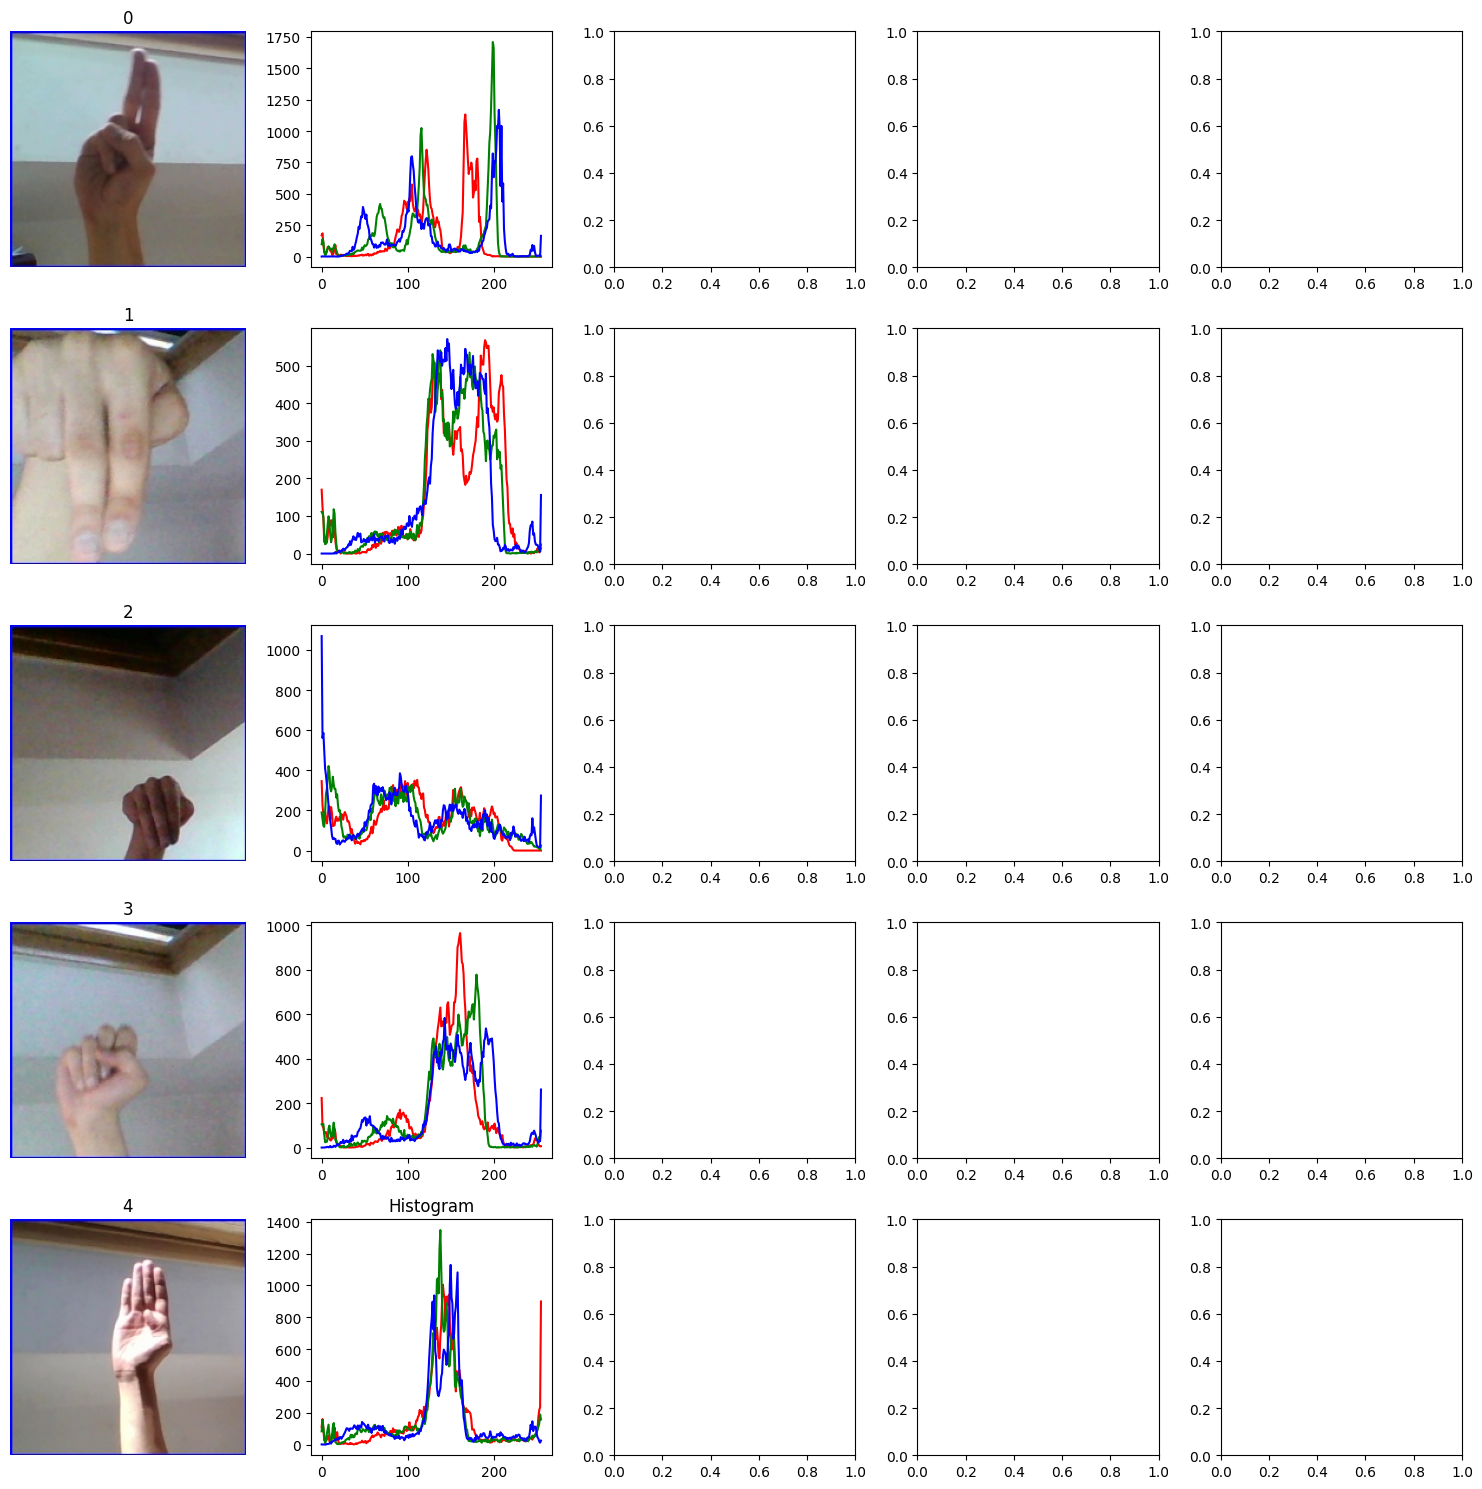

In [12]:
# visualizing random images using histogram
import matplotlib.pyplot as plt
import random as rand
import cv2
import numpy as np
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
random_classes = rand.sample(os.listdir(dataset_dir), 5)
for random_class,col in enumerate(random_classes):
   classes_path = os.path.join(dataset_dir, col)
   random_file = rand.choice(os.listdir(classes_path))
   random_file_path = os.path.join(classes_path, random_file)
   img_bgr = cv2.imread(random_file_path)
   img_converted = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

   axes[random_class,0].imshow(img_converted)
   axes[random_class,0].axis('off')
   axes[random_class,0].set_title(random_class)

    # Histogram
   colors = ('r','g','b')
   for j, col in enumerate(colors):
        hist = cv2.calcHist([img_converted],[j],None,[256],[0,256])
        axes[random_class,1].plot(hist, color=col)
axes[random_class,1].set_title("Histogram")

plt.tight_layout()
plt.show()

# insights: 📓

*   high intensity indicated on x_axis which means that most of the images have a bright background dominating images
*  noticable peaks: indicates that separation between hand and background contrast is significant
*   red is dominant in some images as the skin usually has higher red intensity

# observations: ♦

* Data consists of skewed distributed histograms which must be normalized  
* most pixels consist of the background not the hand making a risk of bias
* color info is important as RGB shows skintones vs background so grey scaling wont be applied

Found 87000 files belonging to 29 classes.
Using 87000 files for training.
Range: 3000-3000 | Imbalance Ratio: 1.00
 Balanced

Class Distribution:
A: 3000
B: 3000
C: 3000
D: 3000
E: 3000
F: 3000
G: 3000
H: 3000
I: 3000
J: 3000
K: 3000
L: 3000
M: 3000
N: 3000
O: 3000
P: 3000
Q: 3000
R: 3000
S: 3000
T: 3000
U: 3000
V: 3000
W: 3000
X: 3000
Y: 3000
Z: 3000
del: 3000
nothing: 3000
space: 3000


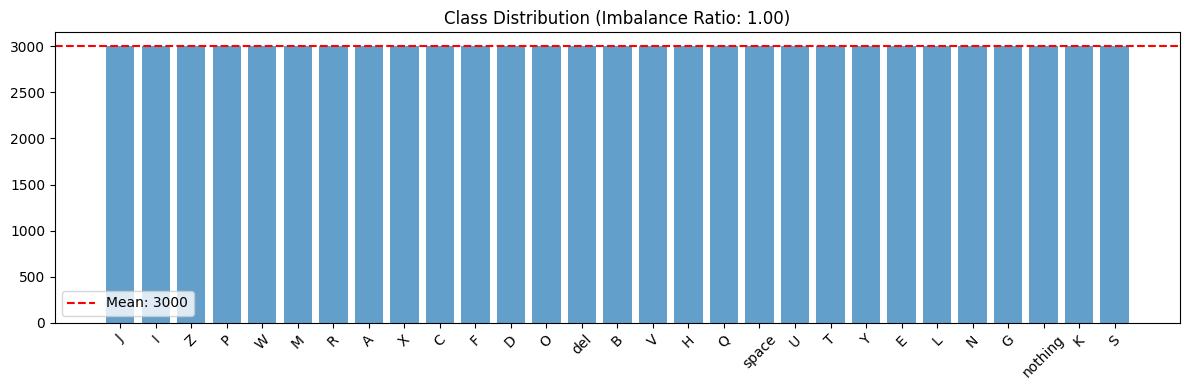

{'J': 3000,
 'I': 3000,
 'Z': 3000,
 'P': 3000,
 'W': 3000,
 'M': 3000,
 'R': 3000,
 'A': 3000,
 'X': 3000,
 'C': 3000,
 'F': 3000,
 'D': 3000,
 'O': 3000,
 'del': 3000,
 'B': 3000,
 'V': 3000,
 'H': 3000,
 'Q': 3000,
 'space': 3000,
 'U': 3000,
 'T': 3000,
 'Y': 3000,
 'E': 3000,
 'L': 3000,
 'N': 3000,
 'G': 3000,
 'nothing': 3000,
 'K': 3000,
 'S': 3000}

In [13]:
from collections import Counter
# a function that is used to check data imbalancement
def check_balance(dataset_dir):
    # Count files in each class folder
    class_counts = {folder: len([f for f in os.listdir(os.path.join(dataset_dir, folder))
                          if f.endswith(('.jpg', '.png', '.jpeg'))])
              for folder in os.listdir(dataset_dir)
              if os.path.isdir(os.path.join(dataset_dir, folder))}

    # Statistics computations
    vals = list(class_counts.values())
    total_samples, num_classes = sum(vals), len(vals)
    min_samples, max_samples, mean_samples = min(vals), max(vals), sum(vals)/len(vals)
    imbalance_ratio = max_samples / min_samples

    # Results
    print(f"Found {total_samples} files belonging to {num_classes} classes.")
    print(f"Using {total_samples} files for training.")
    print(f"Range: {min_samples}-{max_samples} | Imbalance Ratio: {imbalance_ratio:.2f}")
    print(" Balanced" if imbalance_ratio <= 1.5 else "Imbalanced" if imbalance_ratio <= 3 else "Severely Imbalanced")

    # Show distribution
    print("\nClass Distribution:")
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count}")

    plt.figure(figsize=(12, 4))
    plt.bar(class_counts.keys(), class_counts.values(), alpha=0.7)
    plt.axhline(y=mean_samples, color='red', linestyle='--', label=f'Mean: {mean_samples:.0f}')
    plt.title(f'Class Distribution (Imbalance Ratio: {imbalance_ratio:.2f})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return class_counts

def check_tf_balance(train_ds):
    all_labels = [label.numpy() for _, label_batch in train_ds for label in label_batch]
    label_counts = Counter(all_labels)
    imbalance_ratio = max(label_counts.values()) / min(label_counts.values())

    print(f"Train batches: {len(list(train_ds))}")
    print(f"Found {len(all_labels)} files belonging to {len(label_counts)} classes.")
    print("Label Distribution:", dict(sorted(label_counts.items())))

    return label_counts

check_balance("asl_alphabet/asl_alphabet_train/asl_alphabet_train")

# Observation:
data is perfectly balanced with 3000 samples in each class ⚡


# **Dataset preprocessing based on the previous observations ⭐**

In [14]:
# Training dataset
import tensorflow as tf
img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # split training set into 80/20
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [15]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [16]:
# Normalization & augmentation
normalization_layer = tf.keras.layers.Rescaling(1./255)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2),
])


In [17]:
# Apply scaling + augmentation
train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [18]:
# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
print("Train batches:", len(train_ds))
print("Validation batches:", len(val_ds))

Train batches: 2175
Validation batches: 544


# Visualizing data after cleaning 📊

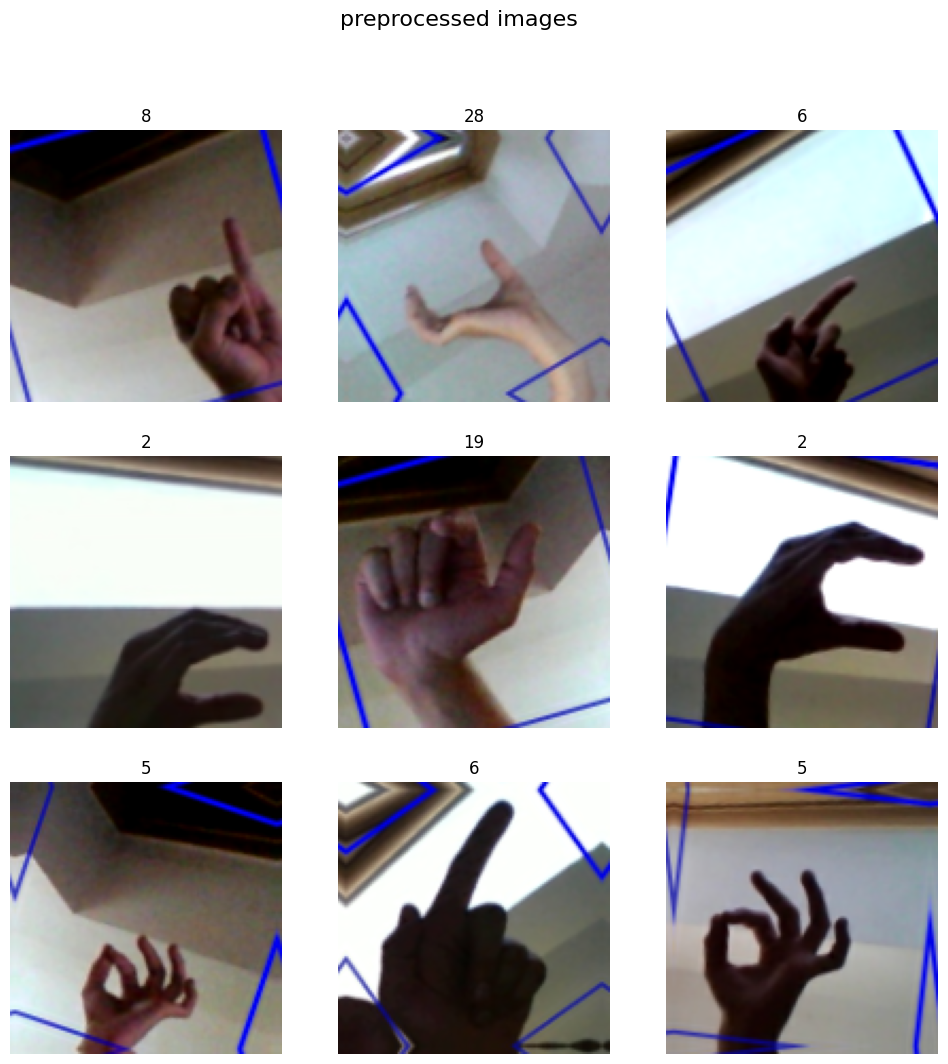

In [20]:
# Take one batch from the training dataset
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    plt.title(int(label_batch[i].numpy()))
    plt.axis("off")
plt.suptitle("preprocessed images", fontsize=16)
plt.show()


# Final Observations:

*   Blue frame indicates standaradize preprocessing
*   The hand is clearly visible now
*   images have proper lightning conditions
*   background is not dominant
